# 구글 드라이브 import

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# colab에서 이미지데이터 압축해제

In [ ]:
#%cd /content/gdrive/MyDrive/세종대수업자료/캡스톤/train
#!unzip -qq "/content/gdrive/MyDrive/세종대수업자료/캡스톤/153.반려동물 안구질환 데이터/01.데이터/1.Training/라벨링데이터/TL1.zip"


/content/gdrive/MyDrive/세종대수업자료/캡스톤/train
replace 개/안구/안구초음파/백내장/무/crop_D0_99ac3014-63a6-11ec-b317-0a7404972c70.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#%cd /content/gdrive/MyDrive/세종대수업자료/캡스톤/train
#!unzip -qq "/content/gdrive/MyDrive/세종대수업자료/캡스톤/153.반려동물 안구질환 데이터/01.데이터/1.Training/라벨링데이터/TL2.zip"

In [ ]:
#%cd /content/gdrive/MyDrive/세종대수업자료/캡스톤/val
#!unzip -qq "/content/gdrive/MyDrive/세종대수업자료/캡스톤/153.반려동물 안구질환 데이터/01.데이터/2.Validation/라벨링데이터/VL.zip"

In [2]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
#-*- coding:utf-8 -*-
import matplotlib.pyplot as plt #모형 학습시 accuracy와 loss를 저장하기 위한 라이브러리입니다.

"""시드 고정을 위한 라이브러리"""
import random
import numpy as np

"""전처리를 위한 라이브러리"""
import os
import pandas as pd

"""Keras 라이브러리"""
import tensorflow.keras as keras #keras 라이브러리입니다.
from tensorflow.keras.preprocessing.image import ImageDataGenerator #이미지 데이터를 tensor로 변한하기 위해 활용되는 라이브러리입니다.
from tensorflow.keras.layers import Dense #학습 모형을 구축하기 위해 활용되는 라이브러리입니다.
from tensorflow.keras import Sequential #학습 모형을 구축하기 위해 활용되는 라이브러리 입니다.

from tensorflow.keras.applications.resnet import ResNet50, ResNet101, ResNet152
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, ResNet101V2, ResNet152V2
from tensorflow.keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.efficientnet import EfficientNetB0
# from tensorflow.keras.utils import multi_gpu_model
#from tensorflow.python.keras.utils.multi_gpu_utils import multi_gpu_model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
import tensorflow.keras.backend as K

val_path = '/content/gdrive/MyDrive/세종대수업자료/캡스톤/백내장val/'

seed = 2

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

class Import_data:
    def __init__(self, train_path):
        self.train_path = train_path
        self.test_path = val_path

    def train(self):
        train_datagen = ImageDataGenerator(rescale=1. / 255,
                                           featurewise_std_normalization=True,
                                           zoom_range=0.2,
                                           channel_shift_range=0.1,
                                           rotation_range=20,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True
                                           )
        train_generator = train_datagen.flow_from_directory(
            self.train_path,
            target_size=(224, 224),
            batch_size=8
        )
        val_generator = train_datagen.flow_from_directory(
            self.test_path,
            target_size=(224, 224),
            batch_size=8
        )

        return train_generator, val_generator


def densenet_121():
    network = DenseNet121(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                          pooling='avg')
    return network


class Load_model:
    def __init__(self, train_path, model_name):
        self.num_class = len(os.listdir(train_path))
        self.model_name = model_name

    def resnet_v1_50(self):
        network = ResNet50(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                           pooling='avg')
        return network

    def resnet_v1_101(self):
        network = ResNet101(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                            pooling='avg')
        return network

    def resnet_v1_152(self):
        network = ResNet152(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                            pooling='avg')
        return network

    def resnet_v2_50(self):
        network = ResNet50V2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                             pooling='avg')
        return network

    def resnet_v2_101(self):
        network = ResNet101V2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                              pooling='avg')
        return network

    def resnet_v2_152(self):
        network = ResNet152V2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                              pooling='avg')
        return network

    def densenet_169(self):
        network = DenseNet169(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                              pooling='avg')
        return network

    def densenet_201(self):
        network = DenseNet201(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                              pooling='avg')
        return network

    def inception_v3(self):
        network = InceptionV3(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                              pooling='avg')
        return network

    def inception_v4(self):
        network = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                                    pooling='avg')
        return network

    def efficientnet(self):
        network = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                                 pooling='avg')
        return network


    def build_network(self):
        if self.model_name == 'resnet_v1_50':
            network = self.resnet_v1_50()
        elif self.model_name == 'resnet_v1_101':
            network = self.resnet_v1_101()
        elif self.model_name == 'resnet_v1_152':
            network = self.resnet_v1_152()
        elif self.model_name == 'resnet_v2_50':
            network = self.resnet_v2_50()
        elif self.model_name == 'resnet_v2_101':
            network = self.resnet_v2_101()
        elif self.model_name == 'resnet_v2_152':
            network = self.resnet_v2_152()
        elif self.model_name == 'densenet_121':
            network = densenet_121()
        elif self.model_name == 'densenet_169':
            network = self.densenet_169()
        elif self.model_name == 'densenet_201':
            network = self.densenet_201()
        elif self.model_name == 'inception_v3':
            network = self.inception_v3()
        elif self.model_name == 'inception_v4':
            network = self.inception_v4()
        elif self.model_name == 'efficientnet':
            network = self.efficientnet()

        model = Sequential()
        model.add(network)
        model.add(Dense(2048, activation='relu'))
        model.add(Dense(self.num_class, activation='softmax'))
        model.summary()

        return model

class Fine_tunning:
    def __init__(self, train_path, model_name, epoch, multi_gpu=0):
        self.data = Import_data(train_path)
        self.train_data, self.val_data = self.data.train()
        self.load_model = Load_model(train_path, model_name)
        self.multi_gpu = multi_gpu
        self.epoch = epoch
        self.model_name = model_name
        self.train_path = train_path

    def training(self):
        data_name = self.train_path.split('/')
        data_name = data_name[len(data_name)-2]
        optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.999, nesterov=True)
        model = self.load_model.build_network()
        save_folder = './model_saved/' + data_name + '/' + self.model_name + '_' + str(self.epoch) + '/'
        if not os.path.exists(save_folder):
            os.makedirs(save_folder)
        check_point = ModelCheckpoint(save_folder + 'model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1,
                                      monitor='val_acc', save_best_only=True, mode='auto')
        if self.multi_gpu == 0:
            model.compile(loss='categorical_crossentropy',
                          optimizer=optimizer,
                          metrics=['acc'])
            history = model.fit(
                self.train_data,
                steps_per_epoch=self.train_data.samples / self.train_data.batch_size,
                epochs=self.epoch,
                validation_data=self.val_data,
                validation_steps=self.val_data.samples / self.val_data.batch_size,
                callbacks=[check_point],
                verbose=1)
        else:
            with tf.device('/cpu:0'):
                cpu_model = model
            model = multi_gpu_model(cpu_model, gpus=self.multi_gpu)
            model.summary()
            model.compile(loss='categorical_crossentropy',
                          optimizer=optimizer,
                          metrics=['acc'])
            history = model.fit(
                self.train_data,
                steps_per_epoch=self.train_data.samples / self.train_data.batch_size,
                epochs=self.epoch,
                validation_data=self.val_data,
                validation_steps=self.val_data.samples / self.val_data.batch_size,
                callbacks=[check_point],
                verbose=1)
        return history

    def save_accuracy(self, history):
        data_name = self.train_path.split('/')
        data_name = data_name[len(data_name)-2]
        save_folder = './model_saved/' + data_name + '/' + self.model_name + '_' + str(self.epoch) + '/'
        acc = history.history['acc']
        val_acc = history.history['val_acc']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(len(acc))
        epoch_list = list(epochs)

        df = pd.DataFrame({'epoch': epoch_list, 'train_accuracy': acc, 'validation_accuracy': val_acc},
                          columns=['epoch', 'train_accuracy', 'validation_accuracy'])
        df_save_path = save_folder + 'accuracy.csv'
        df.to_csv(df_save_path, index=False, encoding='euc-kr')

        plt.plot(epochs, acc, 'b', label='Training acc')
        plt.plot(epochs, val_acc, 'r', label='Validation acc')
        plt.title('Training and validation accuracy')
        plt.legend()
        save_path = save_folder + 'accuracy.png'
        plt.savefig(save_path)
        plt.cla()

        plt.plot(epochs, loss, 'b', label='Training loss')
        plt.plot(epochs, val_loss, 'r', label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        save_path = save_folder + 'loss.png'
        plt.savefig(save_path)
        plt.cla()

        name_list = os.listdir(save_folder)
        h5_list = []
        for name in name_list:
            if '.h5' in name:
                h5_list.append(name)
        h5_list.sort()
        h5_list = [save_folder + name for name in h5_list]
        for path in h5_list[:len(h5_list) - 1]:
            os.remove(path)
        K.clear_session()


Found 2921 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1460: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(


Found 680 images belonging to 4 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dense_1 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 27792260 (106.02 MB)
Trainable params: 27739140 (105.82 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/100
366/365 [==============================] - ETA: 0s - loss: 1.2062 - acc: 0.4964
Epoch 1: val_acc improved from -inf to 0.24706, saving model to ./model_saved/백내장/resnet_v1_50_100/model-001-0.496405-0.247059.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


365/365 [==============================] - 112s 260ms/step - loss: 1.2062 - acc: 0.4964 - val_loss: 684.5175 - val_acc: 0.2471
Epoch 2/100
366/365 [==============================] - ETA: 0s - loss: 1.0170 - acc: 0.5152
Epoch 2: val_acc improved from 0.24706 to 0.25441, saving model to ./model_saved/백내장/resnet_v1_50_100/model-002-0.515235-0.254412.h5
365/365 [==============================] - 78s 213ms/step - loss: 1.0170 - acc: 0.5152 - val_loss: 551.4659 - val_acc: 0.2544
Epoch 3/100
366/365 [==============================] - ETA: 0s - loss: 1.0212 - acc: 0.5091
Epoch 3: val_acc improved from 0.25441 to 0.34265, saving model to ./model_saved/백내장/resnet_v1_50_100/model-003-0.509072-0.342647.h5
365/365 [==============================] - 77s 211ms/step - loss: 1.0212 - acc: 0.5091 - val_loss: 16.9036 - val_acc: 0.3426
Epoch 4/100
366/365 [==============================] - ETA: 0s - loss: 0.9938 - acc: 0.5214
Epoch 4: val_acc improved from 0.34265 to 0.46029, saving model to ./model_saved

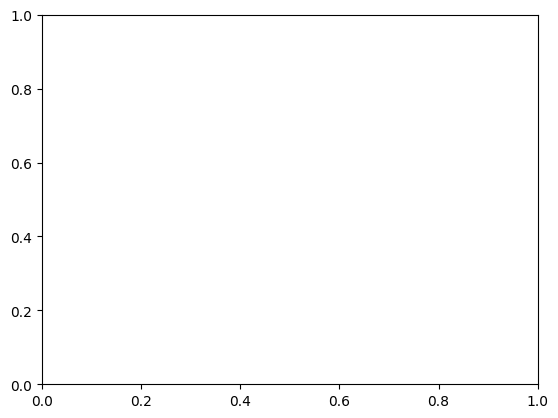

In [5]:
train_path = '/content/gdrive/MyDrive/세종대수업자료/캡스톤/백내장/' #경로 마지막에 반드시 '/'를 기입해야합니다.
model_name = 'resnet_v1_50'
epoch = 100

if __name__ == '__main__':
    fine_tunning = Fine_tunning(train_path=train_path,
                                model_name=model_name,
                                epoch=epoch)
    history = fine_tunning.training()
    fine_tunning.save_accuracy(history)


In [ ]:
import pandas as pd
from sklearn import metrics

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# modelPath = './model_saved/train/efficientnet_200/'  # 모델이 저장된 경로
modelPath = '/content/model_saved/일반/resnet_v1_50_10/'  # 모델이 저장된 경로
weight = 'model-007-0.557414-0.580312.h5'        # 학습된 모델의 파일이름
test_Path = '/content/gdrive/MyDrive/세종대수업자료/캡스톤/val/개/안구/일반/결막염' # 테스트 이미지 폴더

model = load_model(modelPath + weight)
datagen_test = ImageDataGenerator(rescale=1./255)
generator_test = datagen_test.flow_from_directory(directory=test_Path,
                                                  target_size=(224, 224),
                                                  batch_size=256,
                                                  shuffle=False)

# model로 test set 추론
generator_test.reset()
cls_test = generator_test.classes
cls_pred = model.predict(generator_test, verbose=1, workers=0)
cls_pred_argmax = cls_pred.argmax(axis=1)

# 결과 산출 및 저장
report = metrics.classification_report(y_true=cls_test, y_pred=cls_pred_argmax, output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv(f'/content/output/report_test_{weight[:-3]}.csv', index=True, encoding='cp949')
print(report)

Found 8909 images belonging to 9 classes.
35/35 [==============================] - 93s 2s/step
              precision    recall  f1-score      support
0              0.356979  0.454432  0.399854  2403.000000
1              0.720638  0.664090  0.691209  2587.000000
2              0.708598  0.714785  0.711678  3436.000000
3              0.000000  0.000000  0.000000   469.000000
7              0.000000  0.000000  0.000000    14.000000
accuracy       0.591088  0.591088  0.591088     0.591088
macro avg      0.357243  0.366661  0.360548  8909.000000
weighted avg   0.578836  0.591088  0.583043  8909.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
